In [47]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# Load the dataset
df=pd.read_csv("/content/customer_support_tickets.csv")

In [49]:
# Print first 5 rows
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [50]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [51]:
# Print column names
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [52]:
# Replace placeholder text and print it
df['Ticket Description']=df['Ticket Description'].str.replace(r'\{.*?\}', '', regex=True)
print(df['Ticket Description'])

0       I'm having an issue with the . Please assist.\...
1       I'm having an issue with the . Please assist.\...
2       I'm facing a problem with my . The  is not tur...
3       I'm having an issue with the . Please assist.\...
4       I'm having an issue with the . Please assist.\...
                              ...                        
8464    My  is making strange noises and not functioni...
8465    I'm having an issue with the . Please assist.\...
8466    I'm having an issue with the . Please assist. ...
8467    I'm having an issue with the . Please assist. ...
8468    There seems to be a hardware problem with my ....
Name: Ticket Description, Length: 8469, dtype: object


In [53]:
# Clean text function
def clean_text(text):
   if isinstance(text, str):
    text=text.lower()
    text=re.sub(r'\d+', '', text)  # remove numbers
    text=text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text=text.strip()
    text=' '.join(word for word in text.split() if word not in stopwords.words('english'))
    return text
   else:
    return ''

In [54]:
df['cleaned_description']=df['Ticket Description'].apply(clean_text)
df[['Ticket Description', 'cleaned_description']].head()

,Ticket Description,cleaned_description
0,I'm having an issue with the . Please assist.\...,im issue please assist billing zip code apprec...
1,I'm having an issue with the . Please assist.\...,im issue please assist need change existing pr...
2,I'm facing a problem with my . The is not tur...,im facing problem turning working fine yesterd...
3,I'm having an issue with the . Please assist.\...,im issue please assist problem youre intereste...
4,I'm having an issue with the . Please assist.\...,im issue please assist note seller responsible...


In [55]:
# Convert text to TF-IDF features
tfidf=TfidfVectorizer(max_df=0.9, min_df=10)
X=tfidf.fit_transform(df['cleaned_description'])

In [56]:
# KMeans Clustering to group similar issues
kmeans=KMeans(n_clusters=5, random_state=42)
df['Issue Cluster'] = kmeans.fit_predict(X)
df['Issue Cluster']

,Issue Cluster
0,4
1,4
2,4
3,3
4,4
...,...
8464,3
8465,4
8466,1
8467,2


In [57]:
# Top keywords per cluster
def get_top_keywords(n_terms=10):
    order_centroids=kmeans.cluster_centers_.argsort()[:, ::-1]
    terms=tfidf.get_feature_names_out()
    for i in range(5):
        print(f"\nCluster {i} keywords:")
        for ind in order_centroids[i, :n_terms]:
            print(terms[ind])
get_top_keywords()


Cluster 0 keywords:
sure
device
connecting
others
similar
reported
configured
correctly
problems
everything

Cluster 1 keywords:
problem
didnt
resolve
hoping
help
factory
performed
reset
im
please

Cluster 2 keywords:
noticed
mean
popping
peculiar
says
screen
message
error
ive
consistently

Cluster 3 keywords:
productivity
issue
affecting
assistance
soon
work
possible
remains
unresolved
contacted

Cluster 4 keywords:
issue
im
please
assist
ive
persists
data
tried
product
could


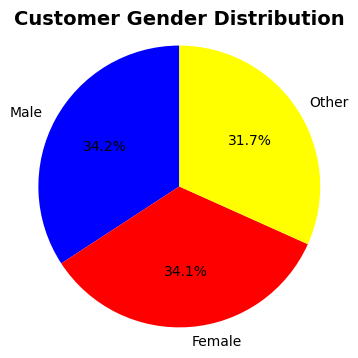

In [58]:
#Customer Gender Distribution
customer_gender_distribution=df['Customer Gender'].value_counts()
color_list=['blue', 'red', 'yellow']
plt.figure(figsize=(4, 4))
plt.pie(customer_gender_distribution, labels=customer_gender_distribution.index, autopct='%1.1f%%', colors=color_list, startangle=90)
plt.title('Customer Gender Distribution', weight='bold', fontsize=14)
plt.axis('equal')
plt.show()

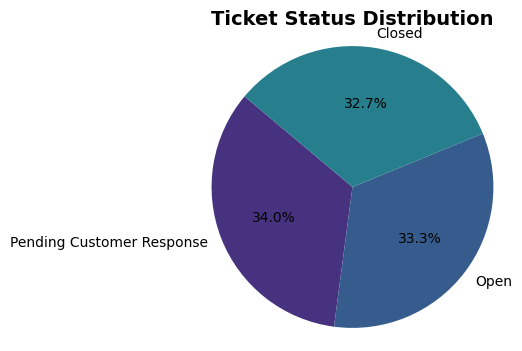

In [59]:
#Ticket Status Distribution
ticket_status_distribution=df['Ticket Status'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(ticket_status_distribution, labels=ticket_status_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=140)
plt.title('Ticket Status Distribution', weight='bold', fontsize=14)
plt.axis('equal')
plt.show()

In [60]:
# Convert time columns
df['First Response Time']=pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution']=pd.to_datetime(df['Time to Resolution'], errors='coerce')

In [61]:
# Calculate response delay (hours)
df['Response Delay (hrs)']=(df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

In [62]:
df.head(2)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,cleaned_description,Issue Cluster,Response Delay (hrs)
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the . Please assist.\...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN,im issue please assist billing zip code apprec...,4,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the . Please assist.\...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN,im issue please assist need change existing pr...,4,NaN


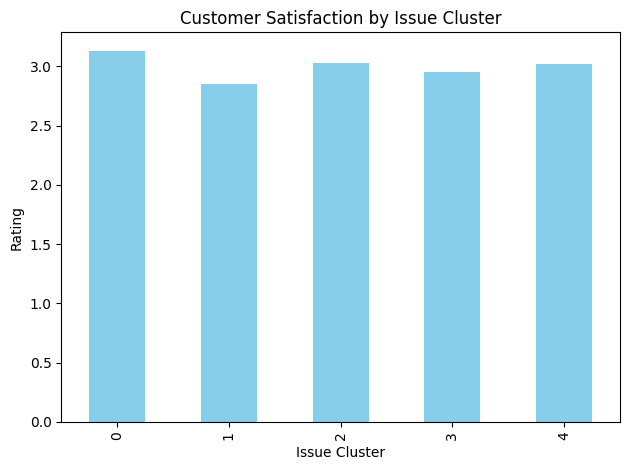

In [63]:
# Average satisfaction rating by issue cluster
satisfaction_by_cluster=df.groupby('Issue Cluster')['Customer Satisfaction Rating'].mean().dropna()
satisfaction_by_cluster.plot(kind='bar', color='skyblue', title='Customer Satisfaction by Issue Cluster', ylabel='Rating')
plt.tight_layout()
plt.show()

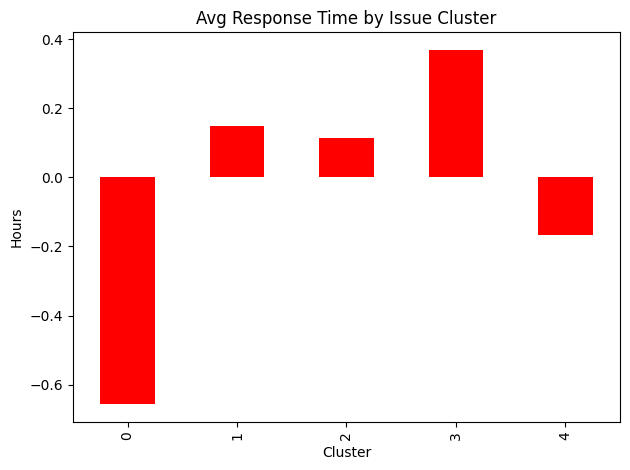

In [64]:
# Average response time by issue cluster
avg_response_by_cluster=df.groupby('Issue Cluster')['Response Delay (hrs)'].mean().dropna()
avg_response_by_cluster.plot(kind='bar',color='red', title='Avg Response Time by Issue Cluster', ylabel='Hours', xlabel='Cluster')
plt.tight_layout()
plt.show()

In [65]:
# Data
ticket_channel_distribution=df['Ticket Channel'].value_counts()
labels=[f"{label}\n{count}" for label, count in zip(ticket_channel_distribution.index, ticket_channel_distribution.values)]
sizes=ticket_channel_distribution.values
colors=sns.color_palette('viridis', len(sizes))

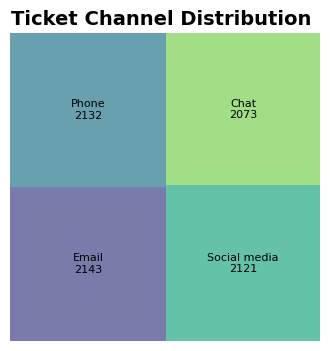

In [66]:
# Ticket Channel Distribution
plt.figure(figsize=(4, 4))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, text_kwargs={'fontsize': 8})
plt.title('Ticket Channel Distribution ', weight='bold', fontsize=14)
plt.axis('off')
plt.show()

In [67]:
# Summary of clusters, delays, and satisfaction
summary=df.groupby('Issue Cluster').agg({
    'Ticket ID': 'count',
    'Response Delay (hrs)': 'mean',
    'Customer Satisfaction Rating': 'mean'
}).rename(columns={'Ticket ID': 'Tickets Count'})
summary

,Tickets Count,Response Delay (hrs),Customer Satisfaction Rating
Issue Cluster,,,
0,655,-0.656698,3.130841
1,1430,0.148482,2.851695
2,695,0.113191,3.029787
3,1152,0.368768,2.955182
4,4537,-0.166052,3.018109


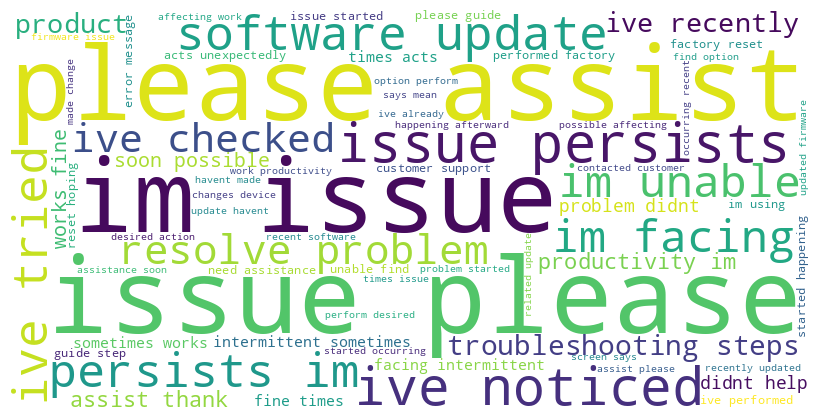

In [68]:
# Create a WordCloud object
text = ' '.join(df['cleaned_description'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [72]:
# Save the processed data
df.to_csv('processed_customer_support_tickets.csv', index=False)
print("Data is save.")

Data is save.
